In [5]:
%reload_kedro

2020-04-03 15:02:27,208 - kedro.context.context - WARNING - Changing the current working directory to /home/ridouane/projects/dynamic-topic-modeling
2020-04-03 15:02:27,227 - root - INFO - ** Kedro project Dynamic Topic Modeling
2020-04-03 15:02:27,228 - root - INFO - Defined global variable `context` and `catalog`
Traceback (most recent call last):
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/kedro/cli/cli.py", line 589, in load_entry_points
    entry_point_commands.append(entry_point.load())
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2449, in load
    self.require(*args, **kwargs)
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6/site-packages/pkg_resources/__init__.py", line 2472, in require
    items = working_set.resolve(reqs, env, installer, extras=self.extras)
  File "/home/ridouane/anaconda3/envs/dynamic-topic-modeling/lib/python3.6

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from gensim import matutils

## Get model

In [7]:
from gensim.models import LdaModel

## Get data

In [8]:
train_docs = catalog.load('train_docs')
train_corpus = catalog.load('train_corpus')
val_docs = catalog.load('val_docs')
val_corpus = catalog.load('val_corpus')
dictionary = catalog.load('dictionary')

2020-04-03 15:02:33,188 - kedro.io.data_catalog - INFO - Loading data from `train_docs` (PickleLocalDataSet)...
2020-04-03 15:02:33,392 - kedro.io.data_catalog - INFO - Loading data from `train_corpus` (MmCorpusDataSet)...
2020-04-03 15:02:33,394 - gensim.corpora.indexedcorpus - INFO - loaded corpus index from data/05_model_input/train_corpus.mm.index
2020-04-03 15:02:33,395 - gensim.corpora._mmreader - INFO - initializing cython corpus reader from data/05_model_input/train_corpus.mm
2020-04-03 15:02:33,395 - gensim.corpora._mmreader - INFO - accepted corpus with 15078 documents, 2744 features, 1062789 non-zero entries
2020-04-03 15:02:33,396 - kedro.io.data_catalog - INFO - Loading data from `val_docs` (PickleLocalDataSet)...
2020-04-03 15:02:33,434 - kedro.io.data_catalog - INFO - Loading data from `val_corpus` (MmCorpusDataSet)...
2020-04-03 15:02:33,436 - gensim.corpora.indexedcorpus - INFO - loaded corpus index from data/05_model_input/val_corpus.mm.index
2020-04-03 15:02:33,437 -

## Train model

In [9]:
def train_model_lda(train_corpus, train_docs,
                    val_corpus, val_docs,
                    dictionary,
                    num_topics=10,
                    epochs=2):
    #filepath = './data/06_models/trained_model_lda.model'
    #if os.path.isfile(filepath):
    #    return LdaModel.load(filepath)

    # Set training parameters.
    chunksize = 2000
    passes = epochs
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    model = LdaModel(
        corpus=train_corpus,
        id2word=dictionary,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every
    )

    beta = model.get_topics()
    theta = matutils.corpus2dense(model.get_document_topics(train_corpus), num_topics).T

    return model, beta, theta

In [10]:
num_topics = 15
epochs = 50

model, beta, theta = train_model_lda(train_corpus, train_docs, val_corpus, val_docs, dictionary, 
                                     num_topics=num_topics, epochs=epochs)

2020-04-03 15:02:46,126 - gensim.models.ldamodel - INFO - using autotuned alpha, starting with [0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667]
2020-04-03 15:02:46,128 - gensim.models.ldamodel - INFO - using serial LDA version on this node
2020-04-03 15:02:46,134 - gensim.models.ldamodel - INFO - running online (multi-pass) LDA training, 15 topics, 50 passes over the supplied corpus of 15078 documents, updating model once every 2000 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2020-04-03 15:02:46,289 - gensim.models.ldamodel - INFO - PROGRESS: pass 0, at document #2000/15078
2020-04-03 15:02:51,056 - gensim.models.ldamodel - INFO - optimized alpha [0.05186662, 0.051872194, 0.04755798, 0.04839923, 0.049638014, 0.0485003, 0.05106309, 0.046725124, 0.06387683, 0.05828443, 0.047962792, 0.047284797, 

2020-04-03 15:03:00,420 - gensim.models.ldamodel - INFO - topic #10 (0.039): 0.025*"edu" + 0.011*"fire" + 0.010*"fbi" + 0.009*"woman" + 0.009*"one" + 0.009*"writes" + 0.008*"would" + 0.007*"people" + 0.007*"article" + 0.006*"koresh"
2020-04-03 15:03:00,421 - gensim.models.ldamodel - INFO - topic #4 (0.059): 0.067*"edu" + 0.018*"university" + 0.015*"posting" + 0.015*"host" + 0.015*"nntp" + 0.010*"new" + 0.008*"distribution" + 0.007*"space" + 0.007*"sale" + 0.007*"pt"
2020-04-03 15:03:00,421 - gensim.models.ldamodel - INFO - topic #1 (0.062): 0.039*"com" + 0.014*"edu" + 0.013*"writes" + 0.013*"article" + 0.011*"car" + 0.008*"posting" + 0.008*"get" + 0.008*"nntp" + 0.008*"like" + 0.008*"host"
2020-04-03 15:03:00,422 - gensim.models.ldamodel - INFO - topic #8 (0.065): 0.010*"people" + 0.010*"edu" + 0.010*"would" + 0.009*"one" + 0.007*"think" + 0.007*"com" + 0.006*"know" + 0.006*"writes" + 0.006*"article" + 0.005*"say"
2020-04-03 15:03:00,423 - gensim.models.ldamodel - INFO - topic diff=0.3

2020-04-03 15:03:08,034 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:03:08,038 - gensim.models.ldamodel - INFO - topic #13 (0.031): 0.046*"max" + 0.025*"armenian" + 0.014*"muslim" + 0.012*"state" + 0.012*"turkish" + 0.012*"president" + 0.011*"mr" + 0.009*"war" + 0.007*"turk" + 0.007*"russian"
2020-04-03 15:03:08,039 - gensim.models.ldamodel - INFO - topic #10 (0.036): 0.023*"edu" + 0.013*"fbi" + 0.012*"fire" + 0.011*"koresh" + 0.010*"writes" + 0.009*"would" + 0.009*"people" + 0.009*"stratus" + 0.009*"child" + 0.008*"one"
2020-04-03 15:03:08,040 - gensim.models.ldamodel - INFO - topic #1 (0.073): 0.044*"com" + 0.014*"writes" + 0.013*"article" + 0.013*"car" + 0.010*"edu" + 0.008*"get" + 0.008*"like" + 0.007*"posting" + 0.007*"one" + 0.006*"nntp"
2020-04-03 15:03:08,041 - gensim.models.ldamodel - INFO - topic #4 (0.074): 0.085*"edu" + 0.024*"university" + 0.019*"posting" + 0.019*"host" + 0.019*"nntp" + 0.011*"nasa" + 0

2020-04-03 15:03:14,005 - gensim.models.ldamodel - INFO - topic diff=0.297200, rho=0.323779
2020-04-03 15:03:14,071 - gensim.models.ldamodel - INFO - PROGRESS: pass 1, at document #14000/15078
2020-04-03 15:03:15,456 - gensim.models.ldamodel - INFO - optimized alpha [0.05183935, 0.08357737, 0.044800308, 0.041382264, 0.09010754, 0.039205365, 0.049688354, 0.0382715, 0.08699403, 0.06801574, 0.03496149, 0.04131291, 0.045088306, 0.02952243, 0.036171023]
2020-04-03 15:03:15,459 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:03:15,462 - gensim.models.ldamodel - INFO - topic #13 (0.030): 0.044*"max" + 0.023*"armenian" + 0.011*"war" + 0.011*"turkish" + 0.011*"state" + 0.010*"muslim" + 0.010*"mr" + 0.009*"russian" + 0.009*"president" + 0.007*"soviet"
2020-04-03 15:03:15,463 - gensim.models.ldamodel - INFO - topic #10 (0.035): 0.022*"edu" + 0.015*"fire" + 0.012*"fbi" + 0.011*"child" + 0.011*"writes" + 0.010*"people" + 0.010*"wou

2020-04-03 15:03:20,499 - gensim.models.ldamodel - INFO - topic #8 (0.096): 0.012*"people" + 0.012*"would" + 0.010*"one" + 0.009*"think" + 0.007*"edu" + 0.007*"say" + 0.006*"know" + 0.006*"writes" + 0.006*"like" + 0.005*"article"
2020-04-03 15:03:20,499 - gensim.models.ldamodel - INFO - topic #4 (0.105): 0.108*"edu" + 0.027*"university" + 0.023*"posting" + 0.022*"host" + 0.022*"nntp" + 0.010*"new" + 0.010*"nasa" + 0.010*"article" + 0.010*"distribution" + 0.009*"c"
2020-04-03 15:03:20,500 - gensim.models.ldamodel - INFO - topic diff=0.269398, rho=0.308035
2020-04-03 15:03:20,590 - gensim.models.ldamodel - INFO - PROGRESS: pass 2, at document #8000/15078
2020-04-03 15:03:21,915 - gensim.models.ldamodel - INFO - optimized alpha [0.053562563, 0.090547465, 0.047322594, 0.04318076, 0.10867584, 0.041314214, 0.051363457, 0.037990194, 0.09834239, 0.07847524, 0.03480255, 0.041978847, 0.047034025, 0.028694391, 0.03652169]
2020-04-03 15:03:21,917 - gensim.models.ldamodel - INFO - merging changes f

2020-04-03 15:03:26,726 - gensim.models.ldamodel - INFO - topic #10 (0.035): 0.016*"edu" + 0.014*"fire" + 0.013*"child" + 0.012*"com" + 0.012*"people" + 0.012*"fbi" + 0.011*"koresh" + 0.010*"would" + 0.010*"writes" + 0.009*"stratus"
2020-04-03 15:03:26,726 - gensim.models.ldamodel - INFO - topic #1 (0.097): 0.039*"com" + 0.012*"car" + 0.012*"writes" + 0.011*"article" + 0.009*"like" + 0.009*"get" + 0.008*"one" + 0.007*"would" + 0.006*"good" + 0.005*"posting"
2020-04-03 15:03:26,729 - gensim.models.ldamodel - INFO - topic #8 (0.107): 0.012*"would" + 0.012*"people" + 0.011*"one" + 0.010*"think" + 0.007*"say" + 0.007*"edu" + 0.006*"writes" + 0.006*"know" + 0.006*"make" + 0.006*"like"
2020-04-03 15:03:26,730 - gensim.models.ldamodel - INFO - topic #4 (0.123): 0.120*"edu" + 0.030*"university" + 0.025*"posting" + 0.025*"host" + 0.024*"nntp" + 0.012*"article" + 0.011*"distribution" + 0.010*"new" + 0.010*"c" + 0.009*"cc"
2020-04-03 15:03:26,731 - gensim.models.ldamodel - INFO - topic diff=0.263

2020-04-03 15:03:33,268 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:03:33,272 - gensim.models.ldamodel - INFO - topic #13 (0.029): 0.045*"max" + 0.022*"armenian" + 0.012*"muslim" + 0.012*"turkish" + 0.011*"president" + 0.010*"war" + 0.009*"mr" + 0.009*"said" + 0.007*"state" + 0.007*"people"
2020-04-03 15:03:33,273 - gensim.models.ldamodel - INFO - topic #10 (0.036): 0.015*"edu" + 0.014*"fire" + 0.013*"people" + 0.013*"com" + 0.013*"fbi" + 0.012*"child" + 0.010*"would" + 0.010*"writes" + 0.009*"koresh" + 0.009*"stratus"
2020-04-03 15:03:33,273 - gensim.models.ldamodel - INFO - topic #1 (0.104): 0.039*"com" + 0.012*"car" + 0.011*"writes" + 0.010*"article" + 0.009*"get" + 0.009*"like" + 0.008*"one" + 0.008*"would" + 0.006*"good" + 0.006*"netcom"
2020-04-03 15:03:33,274 - gensim.models.ldamodel - INFO - topic #8 (0.119): 0.012*"people" + 0.012*"would" + 0.011*"one" + 0.010*"think" + 0.007*"say" + 0.007*"edu" + 0.006*"w

2020-04-03 15:03:37,920 - gensim.models.ldamodel - INFO - topic diff=0.154407, rho=0.282403
2020-04-03 15:03:37,996 - gensim.models.ldamodel - INFO - PROGRESS: pass 4, at document #4000/15078
2020-04-03 15:03:39,215 - gensim.models.ldamodel - INFO - optimized alpha [0.059253786, 0.10937708, 0.05476685, 0.04927891, 0.15696996, 0.05110274, 0.057461575, 0.04035628, 0.12892123, 0.11000258, 0.03724772, 0.04355527, 0.053158924, 0.029127946, 0.03992151]
2020-04-03 15:03:39,218 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:03:39,221 - gensim.models.ldamodel - INFO - topic #13 (0.029): 0.037*"max" + 0.023*"armenian" + 0.014*"president" + 0.013*"muslim" + 0.012*"mr" + 0.010*"war" + 0.010*"turkish" + 0.009*"said" + 0.007*"state" + 0.007*"year"
2020-04-03 15:03:39,222 - gensim.models.ldamodel - INFO - topic #10 (0.037): 0.013*"people" + 0.013*"com" + 0.013*"child" + 0.012*"fire" + 0.012*"edu" + 0.012*"fbi" + 0.011*"koresh" + 0.0

2020-04-03 15:03:44,775 - gensim.models.ldamodel - INFO - topic #8 (0.138): 0.013*"people" + 0.012*"would" + 0.011*"one" + 0.010*"think" + 0.007*"say" + 0.007*"writes" + 0.006*"make" + 0.006*"know" + 0.006*"edu" + 0.006*"article"
2020-04-03 15:03:44,776 - gensim.models.ldamodel - INFO - topic #4 (0.170): 0.141*"edu" + 0.034*"university" + 0.027*"posting" + 0.026*"host" + 0.026*"nntp" + 0.016*"article" + 0.014*"c" + 0.013*"writes" + 0.011*"distribution" + 0.011*"cc"
2020-04-03 15:03:44,777 - gensim.models.ldamodel - INFO - topic diff=0.135665, rho=0.282403
2020-04-03 15:03:44,847 - gensim.models.ldamodel - INFO - PROGRESS: pass 4, at document #14000/15078
2020-04-03 15:03:46,226 - gensim.models.ldamodel - INFO - optimized alpha [0.061333723, 0.11594805, 0.05691999, 0.05156984, 0.17166926, 0.05508558, 0.059865426, 0.04167807, 0.14084405, 0.11994176, 0.038678337, 0.044190496, 0.054571915, 0.029961962, 0.041554715]
2020-04-03 15:03:46,229 - gensim.models.ldamodel - INFO - merging changes f

2020-04-03 15:03:51,032 - gensim.models.ldamodel - INFO - topic #10 (0.040): 0.014*"people" + 0.014*"child" + 0.013*"fire" + 0.012*"com" + 0.011*"would" + 0.011*"fbi" + 0.010*"koresh" + 0.009*"edu" + 0.008*"stratus" + 0.008*"one"
2020-04-03 15:03:51,033 - gensim.models.ldamodel - INFO - topic #9 (0.128): 0.058*"com" + 0.025*"ca" + 0.020*"uk" + 0.020*"writes" + 0.018*"article" + 0.015*"ac" + 0.015*"posting" + 0.013*"nntp" + 0.013*"host" + 0.011*"reply"
2020-04-03 15:03:51,034 - gensim.models.ldamodel - INFO - topic #8 (0.147): 0.013*"people" + 0.013*"would" + 0.012*"one" + 0.011*"think" + 0.007*"say" + 0.007*"know" + 0.007*"writes" + 0.006*"like" + 0.006*"make" + 0.006*"edu"
2020-04-03 15:03:51,035 - gensim.models.ldamodel - INFO - topic #4 (0.182): 0.145*"edu" + 0.035*"university" + 0.028*"posting" + 0.027*"host" + 0.026*"nntp" + 0.017*"article" + 0.015*"c" + 0.014*"writes" + 0.012*"state" + 0.011*"distribution"
2020-04-03 15:03:51,036 - gensim.models.ldamodel - INFO - topic diff=0.121

2020-04-03 15:03:56,689 - gensim.models.ldamodel - INFO - merging changes from 1078 documents into a model of 15078 documents
2020-04-03 15:03:56,692 - gensim.models.ldamodel - INFO - topic #13 (0.031): 0.030*"max" + 0.019*"armenian" + 0.012*"president" + 0.011*"war" + 0.010*"muslim" + 0.010*"mr" + 0.009*"turkish" + 0.009*"said" + 0.008*"year" + 0.008*"state"
2020-04-03 15:03:56,693 - gensim.models.ldamodel - INFO - topic #10 (0.041): 0.014*"people" + 0.013*"child" + 0.012*"fire" + 0.011*"would" + 0.011*"fbi" + 0.010*"com" + 0.010*"one" + 0.009*"koresh" + 0.009*"said" + 0.008*"stratus"
2020-04-03 15:03:56,694 - gensim.models.ldamodel - INFO - topic #9 (0.136): 0.062*"com" + 0.026*"ca" + 0.020*"writes" + 0.020*"uk" + 0.018*"article" + 0.015*"posting" + 0.015*"ac" + 0.014*"nntp" + 0.014*"host" + 0.011*"reply"
2020-04-03 15:03:56,696 - gensim.models.ldamodel - INFO - topic #8 (0.156): 0.013*"would" + 0.012*"people" + 0.012*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.006*"writes

2020-04-03 15:04:01,659 - gensim.models.ldamodel - INFO - topic diff=0.099396, rho=0.262260
2020-04-03 15:04:01,723 - gensim.models.ldamodel - INFO - PROGRESS: pass 6, at document #10000/15078
2020-04-03 15:04:02,844 - gensim.models.ldamodel - INFO - optimized alpha [0.065773055, 0.12641415, 0.06413147, 0.056350064, 0.20791516, 0.0644335, 0.06311489, 0.04459455, 0.16434404, 0.14590904, 0.042798683, 0.046210922, 0.06001207, 0.031925775, 0.045926422]
2020-04-03 15:04:02,847 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:04:02,850 - gensim.models.ldamodel - INFO - topic #13 (0.032): 0.042*"max" + 0.021*"armenian" + 0.012*"president" + 0.011*"muslim" + 0.011*"turkish" + 0.010*"war" + 0.009*"mr" + 0.009*"said" + 0.009*"jew" + 0.008*"year"
2020-04-03 15:04:02,851 - gensim.models.ldamodel - INFO - topic #10 (0.043): 0.015*"people" + 0.013*"fire" + 0.012*"child" + 0.011*"fbi" + 0.011*"would" + 0.010*"com" + 0.010*"one" + 0.00

2020-04-03 15:04:07,218 - gensim.models.ldamodel - INFO - topic #8 (0.171): 0.013*"people" + 0.013*"would" + 0.012*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.007*"writes" + 0.006*"like" + 0.006*"make" + 0.006*"question"
2020-04-03 15:04:07,219 - gensim.models.ldamodel - INFO - topic #4 (0.213): 0.156*"edu" + 0.037*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.020*"article" + 0.018*"c" + 0.017*"writes" + 0.011*"distribution" + 0.011*"state"
2020-04-03 15:04:07,220 - gensim.models.ldamodel - INFO - topic diff=0.087842, rho=0.253681
2020-04-03 15:04:07,287 - gensim.models.ldamodel - INFO - PROGRESS: pass 7, at document #4000/15078
2020-04-03 15:04:08,484 - gensim.models.ldamodel - INFO - optimized alpha [0.066552654, 0.12840456, 0.066321984, 0.05784143, 0.21551867, 0.067096725, 0.06391707, 0.04566018, 0.17187694, 0.15496475, 0.04450716, 0.046817224, 0.06187601, 0.032820627, 0.047458485]
2020-04-03 15:04:08,487 - gensim.models.ldamodel - INFO - merging change

2020-04-03 15:04:13,496 - gensim.models.ldamodel - INFO - topic #10 (0.046): 0.015*"people" + 0.012*"child" + 0.011*"would" + 0.011*"fire" + 0.011*"one" + 0.011*"said" + 0.010*"fbi" + 0.008*"com" + 0.008*"koresh" + 0.008*"stratus"
2020-04-03 15:04:13,497 - gensim.models.ldamodel - INFO - topic #9 (0.161): 0.075*"com" + 0.025*"ca" + 0.021*"writes" + 0.020*"article" + 0.019*"uk" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.014*"ac" + 0.011*"reply"
2020-04-03 15:04:13,498 - gensim.models.ldamodel - INFO - topic #8 (0.180): 0.013*"people" + 0.013*"would" + 0.012*"one" + 0.010*"think" + 0.008*"say" + 0.007*"know" + 0.007*"writes" + 0.007*"make" + 0.006*"like" + 0.006*"article"
2020-04-03 15:04:13,499 - gensim.models.ldamodel - INFO - topic #4 (0.225): 0.159*"edu" + 0.038*"university" + 0.028*"posting" + 0.027*"host" + 0.027*"nntp" + 0.020*"article" + 0.018*"c" + 0.017*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:04:13,500 - gensim.models.ldamodel - INFO - topic diff=0.079967, 

2020-04-03 15:04:18,970 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:04:18,973 - gensim.models.ldamodel - INFO - topic #13 (0.034): 0.027*"max" + 0.020*"armenian" + 0.014*"president" + 0.011*"muslim" + 0.011*"war" + 0.010*"mr" + 0.009*"turkish" + 0.009*"said" + 0.008*"jew" + 0.008*"year"
2020-04-03 15:04:18,974 - gensim.models.ldamodel - INFO - topic #7 (0.047): 0.031*"key" + 0.024*"government" + 0.016*"chip" + 0.015*"law" + 0.014*"israel" + 0.013*"clipper" + 0.013*"encryption" + 0.011*"right" + 0.011*"public" + 0.011*"security"
2020-04-03 15:04:18,975 - gensim.models.ldamodel - INFO - topic #9 (0.171): 0.077*"com" + 0.025*"ca" + 0.022*"writes" + 0.020*"article" + 0.019*"uk" + 0.018*"posting" + 0.016*"nntp" + 0.016*"host" + 0.014*"ac" + 0.012*"reply"
2020-04-03 15:04:18,976 - gensim.models.ldamodel - INFO - topic #8 (0.186): 0.013*"would" + 0.013*"people" + 0.012*"one" + 0.011*"think" + 0.007*"say" + 0.007*"know" + 

2020-04-03 15:04:23,952 - gensim.models.ldamodel - INFO - topic diff=0.080376, rho=0.245893
2020-04-03 15:04:24,009 - gensim.models.ldamodel - INFO - PROGRESS: pass 8, at document #15078/15078
2020-04-03 15:04:24,642 - gensim.models.ldamodel - INFO - optimized alpha [0.06915485, 0.13490404, 0.0710223, 0.061211, 0.23894206, 0.072851464, 0.06582766, 0.04813492, 0.19316751, 0.17698933, 0.049277157, 0.0484985, 0.06559616, 0.03527632, 0.05138361]
2020-04-03 15:04:24,646 - gensim.models.ldamodel - INFO - merging changes from 1078 documents into a model of 15078 documents
2020-04-03 15:04:24,649 - gensim.models.ldamodel - INFO - topic #13 (0.035): 0.030*"max" + 0.019*"armenian" + 0.012*"president" + 0.011*"war" + 0.010*"muslim" + 0.010*"mr" + 0.009*"turkish" + 0.009*"year" + 0.008*"jew" + 0.008*"said"
2020-04-03 15:04:24,650 - gensim.models.ldamodel - INFO - topic #7 (0.048): 0.030*"key" + 0.024*"government" + 0.016*"chip" + 0.015*"law" + 0.015*"israel" + 0.012*"clipper" + 0.011*"public" + 0.

2020-04-03 15:04:29,590 - gensim.models.ldamodel - INFO - topic #8 (0.200): 0.014*"people" + 0.013*"would" + 0.012*"one" + 0.011*"think" + 0.007*"say" + 0.007*"know" + 0.007*"like" + 0.007*"make" + 0.006*"writes" + 0.006*"question"
2020-04-03 15:04:29,592 - gensim.models.ldamodel - INFO - topic #4 (0.247): 0.164*"edu" + 0.039*"university" + 0.028*"posting" + 0.027*"host" + 0.027*"nntp" + 0.021*"article" + 0.020*"c" + 0.019*"writes" + 0.011*"state" + 0.011*"distribution"
2020-04-03 15:04:29,593 - gensim.models.ldamodel - INFO - topic diff=0.069405, rho=0.238780
2020-04-03 15:04:29,677 - gensim.models.ldamodel - INFO - PROGRESS: pass 9, at document #10000/15078
2020-04-03 15:04:30,815 - gensim.models.ldamodel - INFO - optimized alpha [0.07044393, 0.1374468, 0.073142864, 0.061892148, 0.25054803, 0.074120544, 0.06611832, 0.04846334, 0.20003118, 0.18613972, 0.050755613, 0.048602555, 0.06720721, 0.036044367, 0.052524943]
2020-04-03 15:04:30,818 - gensim.models.ldamodel - INFO - merging chang

2020-04-03 15:04:35,185 - gensim.models.ldamodel - INFO - topic #11 (0.049): 0.051*"god" + 0.022*"christian" + 0.020*"jesus" + 0.013*"one" + 0.012*"church" + 0.012*"bible" + 0.011*"christ" + 0.009*"say" + 0.009*"lord" + 0.009*"u"
2020-04-03 15:04:35,186 - gensim.models.ldamodel - INFO - topic #9 (0.192): 0.087*"com" + 0.024*"ca" + 0.023*"writes" + 0.022*"article" + 0.019*"posting" + 0.018*"uk" + 0.017*"host" + 0.017*"nntp" + 0.013*"ac" + 0.012*"reply"
2020-04-03 15:04:35,187 - gensim.models.ldamodel - INFO - topic #8 (0.206): 0.013*"would" + 0.013*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.007*"like" + 0.007*"make" + 0.007*"writes" + 0.006*"way"
2020-04-03 15:04:35,188 - gensim.models.ldamodel - INFO - topic #4 (0.253): 0.165*"edu" + 0.040*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.022*"article" + 0.021*"c" + 0.020*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:04:35,188 - gensim.models.ldamodel - INFO - topic diff=0.064600, rho=0

2020-04-03 15:04:41,297 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:04:41,301 - gensim.models.ldamodel - INFO - topic #13 (0.038): 0.045*"max" + 0.023*"armenian" + 0.011*"jew" + 0.011*"turkish" + 0.011*"muslim" + 0.011*"war" + 0.010*"president" + 0.009*"mr" + 0.008*"year" + 0.007*"jewish"
2020-04-03 15:04:41,301 - gensim.models.ldamodel - INFO - topic #11 (0.049): 0.050*"god" + 0.025*"christian" + 0.019*"jesus" + 0.013*"bible" + 0.013*"one" + 0.012*"church" + 0.010*"christ" + 0.009*"sin" + 0.009*"say" + 0.008*"u"
2020-04-03 15:04:41,302 - gensim.models.ldamodel - INFO - topic #9 (0.199): 0.091*"com" + 0.024*"ca" + 0.023*"writes" + 0.022*"article" + 0.019*"posting" + 0.018*"uk" + 0.017*"host" + 0.016*"nntp" + 0.012*"ac" + 0.012*"reply"
2020-04-03 15:04:41,303 - gensim.models.ldamodel - INFO - topic #8 (0.214): 0.014*"people" + 0.013*"would" + 0.012*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.007*"like" + 

2020-04-03 15:04:45,626 - gensim.models.ldamodel - INFO - topic diff=0.058015, rho=0.226229
2020-04-03 15:04:45,698 - gensim.models.ldamodel - INFO - PROGRESS: pass 11, at document #6000/15078
2020-04-03 15:04:46,814 - gensim.models.ldamodel - INFO - optimized alpha [0.071996816, 0.14061761, 0.07688474, 0.064303525, 0.26812845, 0.07719742, 0.06653328, 0.050183974, 0.21870881, 0.20732825, 0.05510372, 0.049597584, 0.07070671, 0.03833601, 0.05565291]
2020-04-03 15:04:46,817 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:04:46,820 - gensim.models.ldamodel - INFO - topic #13 (0.038): 0.028*"max" + 0.020*"armenian" + 0.014*"president" + 0.011*"muslim" + 0.011*"war" + 0.011*"jew" + 0.010*"mr" + 0.009*"turkish" + 0.008*"state" + 0.008*"said"
2020-04-03 15:04:46,821 - gensim.models.ldamodel - INFO - topic #11 (0.050): 0.051*"god" + 0.022*"christian" + 0.019*"jesus" + 0.013*"church" + 0.013*"one" + 0.012*"bible" + 0.010*"christ

2020-04-03 15:04:52,055 - gensim.models.ldamodel - INFO - topic #8 (0.226): 0.013*"people" + 0.013*"would" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.007*"like" + 0.007*"make" + 0.006*"writes" + 0.006*"way"
2020-04-03 15:04:52,056 - gensim.models.ldamodel - INFO - topic #4 (0.275): 0.168*"edu" + 0.041*"university" + 0.028*"posting" + 0.027*"host" + 0.027*"nntp" + 0.022*"article" + 0.022*"c" + 0.021*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:04:52,057 - gensim.models.ldamodel - INFO - topic diff=0.064018, rho=0.226229
2020-04-03 15:04:52,109 - gensim.models.ldamodel - INFO - PROGRESS: pass 11, at document #15078/15078
2020-04-03 15:04:52,866 - gensim.models.ldamodel - INFO - optimized alpha [0.0724406, 0.14260213, 0.077415004, 0.06487583, 0.27548462, 0.07804744, 0.06649265, 0.051008914, 0.2257603, 0.2115704, 0.05647333, 0.050125804, 0.071766704, 0.039122235, 0.056480166]
2020-04-03 15:04:52,869 - gensim.models.ldamodel - INFO - merging changes from 1078 docu

2020-04-03 15:04:57,976 - gensim.models.ldamodel - INFO - topic #11 (0.050): 0.053*"god" + 0.024*"christian" + 0.019*"jesus" + 0.014*"bible" + 0.013*"church" + 0.012*"one" + 0.010*"christ" + 0.009*"faith" + 0.008*"u" + 0.008*"say"
2020-04-03 15:04:57,977 - gensim.models.ldamodel - INFO - topic #9 (0.218): 0.095*"com" + 0.024*"writes" + 0.022*"ca" + 0.022*"article" + 0.019*"posting" + 0.017*"uk" + 0.017*"host" + 0.017*"nntp" + 0.012*"ac" + 0.012*"reply"
2020-04-03 15:04:57,978 - gensim.models.ldamodel - INFO - topic #8 (0.232): 0.014*"people" + 0.014*"would" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.008*"know" + 0.007*"like" + 0.007*"make" + 0.006*"writes" + 0.006*"even"
2020-04-03 15:04:57,979 - gensim.models.ldamodel - INFO - topic #4 (0.282): 0.168*"edu" + 0.041*"university" + 0.028*"posting" + 0.027*"host" + 0.027*"nntp" + 0.022*"article" + 0.022*"c" + 0.021*"writes" + 0.011*"state" + 0.011*"cc"
2020-04-03 15:04:57,980 - gensim.models.ldamodel - INFO - topic diff=0.055846, rho

2020-04-03 15:05:03,712 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:05:03,715 - gensim.models.ldamodel - INFO - topic #13 (0.040): 0.036*"max" + 0.020*"armenian" + 0.012*"president" + 0.011*"muslim" + 0.011*"war" + 0.010*"jew" + 0.009*"turkish" + 0.009*"mr" + 0.008*"state" + 0.008*"year"
2020-04-03 15:05:03,716 - gensim.models.ldamodel - INFO - topic #11 (0.051): 0.052*"god" + 0.023*"christian" + 0.021*"jesus" + 0.013*"church" + 0.012*"one" + 0.012*"bible" + 0.011*"christ" + 0.009*"say" + 0.009*"lord" + 0.009*"faith"
2020-04-03 15:05:03,717 - gensim.models.ldamodel - INFO - topic #9 (0.223): 0.099*"com" + 0.025*"writes" + 0.023*"article" + 0.023*"ca" + 0.019*"posting" + 0.018*"uk" + 0.017*"host" + 0.017*"nntp" + 0.012*"reply" + 0.012*"ac"
2020-04-03 15:05:03,717 - gensim.models.ldamodel - INFO - topic #8 (0.238): 0.014*"would" + 0.013*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.007*"like

2020-04-03 15:05:08,527 - gensim.models.ldamodel - INFO - topic diff=0.049560, rho=0.215470
2020-04-03 15:05:08,612 - gensim.models.ldamodel - INFO - PROGRESS: pass 13, at document #12000/15078
2020-04-03 15:05:09,790 - gensim.models.ldamodel - INFO - optimized alpha [0.07450467, 0.1484259, 0.07979529, 0.06631976, 0.29693303, 0.080040075, 0.06679563, 0.051930726, 0.24457482, 0.22973041, 0.059780203, 0.05064239, 0.074716255, 0.04095347, 0.05909162]
2020-04-03 15:05:09,792 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:05:09,795 - gensim.models.ldamodel - INFO - topic #13 (0.041): 0.044*"max" + 0.022*"armenian" + 0.012*"jew" + 0.011*"muslim" + 0.010*"war" + 0.010*"turkish" + 0.010*"president" + 0.009*"mr" + 0.008*"arab" + 0.008*"year"
2020-04-03 15:05:09,796 - gensim.models.ldamodel - INFO - topic #11 (0.051): 0.051*"god" + 0.025*"christian" + 0.019*"jesus" + 0.013*"bible" + 0.013*"church" + 0.012*"one" + 0.011*"christ"

2020-04-03 15:05:14,096 - gensim.models.ldamodel - INFO - topic #8 (0.247): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.008*"know" + 0.007*"like" + 0.007*"make" + 0.006*"writes" + 0.006*"even"
2020-04-03 15:05:14,096 - gensim.models.ldamodel - INFO - topic #4 (0.301): 0.167*"edu" + 0.042*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.023*"c" + 0.023*"article" + 0.021*"writes" + 0.011*"state" + 0.011*"cc"
2020-04-03 15:05:14,097 - gensim.models.ldamodel - INFO - topic diff=0.048556, rho=0.210636
2020-04-03 15:05:14,163 - gensim.models.ldamodel - INFO - PROGRESS: pass 14, at document #6000/15078
2020-04-03 15:05:15,206 - gensim.models.ldamodel - INFO - optimized alpha [0.07471885, 0.14717096, 0.08080226, 0.06689515, 0.30106044, 0.080675565, 0.06655965, 0.052223746, 0.24899949, 0.23489162, 0.06075041, 0.050943147, 0.07550358, 0.041459106, 0.059673842]
2020-04-03 15:05:15,209 - gensim.models.ldamodel - INFO - merging changes from 2000 do

2020-04-03 15:05:19,979 - gensim.models.ldamodel - INFO - topic #11 (0.051): 0.053*"god" + 0.024*"christian" + 0.019*"jesus" + 0.013*"bible" + 0.013*"church" + 0.012*"one" + 0.011*"christ" + 0.009*"sin" + 0.009*"faith" + 0.009*"book"
2020-04-03 15:05:19,980 - gensim.models.ldamodel - INFO - topic #9 (0.238): 0.104*"com" + 0.026*"writes" + 0.024*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"uk" + 0.017*"host" + 0.017*"nntp" + 0.012*"reply" + 0.011*"ac"
2020-04-03 15:05:19,981 - gensim.models.ldamodel - INFO - topic #8 (0.257): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.007*"know" + 0.007*"like" + 0.007*"make" + 0.006*"way" + 0.006*"writes"
2020-04-03 15:05:19,981 - gensim.models.ldamodel - INFO - topic #4 (0.308): 0.169*"edu" + 0.042*"university" + 0.028*"posting" + 0.027*"host" + 0.027*"nntp" + 0.023*"article" + 0.023*"c" + 0.022*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:05:19,982 - gensim.models.ldamodel - INFO - topic diff=0.054735, r

2020-04-03 15:05:25,220 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:05:25,225 - gensim.models.ldamodel - INFO - topic #13 (0.042): 0.046*"max" + 0.019*"armenian" + 0.013*"president" + 0.012*"jew" + 0.012*"muslim" + 0.011*"turkish" + 0.010*"war" + 0.010*"mr" + 0.010*"israel" + 0.008*"arab"
2020-04-03 15:05:25,226 - gensim.models.ldamodel - INFO - topic #11 (0.051): 0.054*"god" + 0.025*"christian" + 0.019*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"one" + 0.010*"christ" + 0.009*"faith" + 0.009*"religion" + 0.008*"sin"
2020-04-03 15:05:25,227 - gensim.models.ldamodel - INFO - topic #9 (0.243): 0.103*"com" + 0.025*"writes" + 0.023*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.011*"ac"
2020-04-03 15:05:25,228 - gensim.models.ldamodel - INFO - topic #8 (0.262): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"know" + 0.008*"say" + 0.007*

2020-04-03 15:05:29,312 - gensim.models.ldamodel - INFO - topic diff=0.062663, rho=0.206113
2020-04-03 15:05:29,453 - gensim.models.ldamodel - INFO - PROGRESS: pass 16, at document #2000/15078
2020-04-03 15:05:30,463 - gensim.models.ldamodel - INFO - optimized alpha [0.07599148, 0.15154655, 0.082050666, 0.06784365, 0.31785518, 0.08172726, 0.065910816, 0.053055476, 0.267274, 0.2455095, 0.06310376, 0.051784724, 0.07771132, 0.043062646, 0.06126183]
2020-04-03 15:05:30,466 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:05:30,469 - gensim.models.ldamodel - INFO - topic #13 (0.043): 0.035*"max" + 0.020*"armenian" + 0.012*"israel" + 0.012*"president" + 0.011*"muslim" + 0.011*"war" + 0.010*"jew" + 0.010*"arab" + 0.009*"turkish" + 0.009*"state"
2020-04-03 15:05:30,469 - gensim.models.ldamodel - INFO - topic #11 (0.052): 0.053*"god" + 0.023*"christian" + 0.021*"jesus" + 0.013*"church" + 0.013*"bible" + 0.012*"one" + 0.011*"chri

2020-04-03 15:05:34,956 - gensim.models.ldamodel - INFO - topic #8 (0.271): 0.014*"people" + 0.014*"would" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.008*"know" + 0.007*"like" + 0.007*"make" + 0.006*"writes" + 0.006*"thing"
2020-04-03 15:05:34,957 - gensim.models.ldamodel - INFO - topic #4 (0.326): 0.169*"edu" + 0.042*"university" + 0.028*"posting" + 0.027*"host" + 0.027*"nntp" + 0.023*"article" + 0.023*"c" + 0.022*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:05:34,958 - gensim.models.ldamodel - INFO - topic diff=0.043673, rho=0.201870
2020-04-03 15:05:35,026 - gensim.models.ldamodel - INFO - PROGRESS: pass 16, at document #12000/15078
2020-04-03 15:05:36,060 - gensim.models.ldamodel - INFO - optimized alpha [0.076864146, 0.15526381, 0.08248814, 0.06842568, 0.32591388, 0.082739174, 0.065917514, 0.05323739, 0.2738304, 0.25076813, 0.06385119, 0.051934797, 0.07861212, 0.0434869, 0.06211842]
2020-04-03 15:05:36,062 - gensim.models.ldamodel - INFO - merging changes from 2000 doc

2020-04-03 15:05:40,106 - gensim.models.ldamodel - INFO - topic #11 (0.052): 0.053*"god" + 0.023*"christian" + 0.020*"jesus" + 0.013*"church" + 0.013*"bible" + 0.012*"one" + 0.011*"christ" + 0.009*"faith" + 0.009*"sin" + 0.009*"u"
2020-04-03 15:05:40,107 - gensim.models.ldamodel - INFO - topic #9 (0.252): 0.109*"com" + 0.026*"writes" + 0.025*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"ac"
2020-04-03 15:05:40,108 - gensim.models.ldamodel - INFO - topic #8 (0.277): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know" + 0.007*"like" + 0.007*"make" + 0.006*"writes" + 0.006*"even"
2020-04-03 15:05:40,109 - gensim.models.ldamodel - INFO - topic #4 (0.329): 0.168*"edu" + 0.043*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.023*"article" + 0.023*"c" + 0.022*"writes" + 0.011*"state" + 0.011*"cc"
2020-04-03 15:05:40,110 - gensim.models.ldamodel - INFO - topic diff=0.043266, rho

2020-04-03 15:05:45,746 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:05:45,749 - gensim.models.ldamodel - INFO - topic #13 (0.044): 0.036*"max" + 0.019*"armenian" + 0.013*"israel" + 0.012*"war" + 0.011*"jew" + 0.010*"president" + 0.010*"mr" + 0.010*"muslim" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:05:45,750 - gensim.models.ldamodel - INFO - topic #11 (0.052): 0.053*"god" + 0.025*"christian" + 0.020*"jesus" + 0.013*"bible" + 0.013*"church" + 0.012*"one" + 0.011*"christ" + 0.009*"sin" + 0.009*"faith" + 0.009*"book"
2020-04-03 15:05:45,750 - gensim.models.ldamodel - INFO - topic #9 (0.256): 0.110*"com" + 0.027*"writes" + 0.024*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"ac"
2020-04-03 15:05:45,751 - gensim.models.ldamodel - INFO - topic #8 (0.286): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.008*"know" + 0.007*"lik

2020-04-03 15:05:49,709 - gensim.models.ldamodel - INFO - topic diff=0.045087, rho=0.194114
2020-04-03 15:05:49,784 - gensim.models.ldamodel - INFO - PROGRESS: pass 18, at document #8000/15078
2020-04-03 15:05:50,931 - gensim.models.ldamodel - INFO - optimized alpha [0.07766563, 0.15596104, 0.084055975, 0.06960791, 0.33943436, 0.08440873, 0.06502895, 0.0538692, 0.29103926, 0.26020926, 0.0657528, 0.052608985, 0.08034449, 0.044637904, 0.063285984]
2020-04-03 15:05:50,934 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:05:50,937 - gensim.models.ldamodel - INFO - topic #13 (0.045): 0.046*"max" + 0.019*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"jew" + 0.012*"muslim" + 0.011*"turkish" + 0.010*"war" + 0.010*"mr" + 0.009*"arab"
2020-04-03 15:05:50,937 - gensim.models.ldamodel - INFO - topic #11 (0.053): 0.054*"god" + 0.025*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"one" + 0.010*"christ"

2020-04-03 15:05:54,966 - gensim.models.ldamodel - INFO - topic #8 (0.295): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know" + 0.007*"like" + 0.007*"make" + 0.006*"way" + 0.006*"even"
2020-04-03 15:05:54,967 - gensim.models.ldamodel - INFO - topic #4 (0.342): 0.170*"edu" + 0.043*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:05:54,968 - gensim.models.ldamodel - INFO - topic diff=0.056657, rho=0.194114
2020-04-03 15:05:55,052 - gensim.models.ldamodel - INFO - PROGRESS: pass 19, at document #2000/15078
2020-04-03 15:05:56,113 - gensim.models.ldamodel - INFO - optimized alpha [0.07813267, 0.15710145, 0.084337756, 0.06965304, 0.34261727, 0.084496595, 0.06456074, 0.054177385, 0.2965566, 0.26140422, 0.06633885, 0.052827, 0.08097548, 0.045110468, 0.063818924]
2020-04-03 15:05:56,116 - gensim.models.ldamodel - INFO - merging changes from 2000 d

2020-04-03 15:06:00,680 - gensim.models.ldamodel - INFO - topic #11 (0.053): 0.054*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"one" + 0.011*"christ" + 0.010*"religion" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:06:00,680 - gensim.models.ldamodel - INFO - topic #9 (0.266): 0.110*"com" + 0.026*"writes" + 0.024*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:06:00,681 - gensim.models.ldamodel - INFO - topic #8 (0.301): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"know" + 0.008*"say" + 0.007*"like" + 0.007*"make" + 0.006*"thing" + 0.006*"writes"
2020-04-03 15:06:00,682 - gensim.models.ldamodel - INFO - topic #4 (0.350): 0.170*"edu" + 0.043*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"c" + 0.022*"writes" + 0.011*"cc" + 0.011*"distribution"
2020-04-03 15:06:00,683 - gensim.models.ldamodel - INFO -

2020-04-03 15:06:06,006 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:06:06,009 - gensim.models.ldamodel - INFO - topic #13 (0.045): 0.034*"max" + 0.020*"armenian" + 0.015*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"mr" + 0.011*"war" + 0.011*"jew" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:06:06,011 - gensim.models.ldamodel - INFO - topic #11 (0.053): 0.054*"god" + 0.024*"christian" + 0.021*"jesus" + 0.014*"church" + 0.013*"bible" + 0.012*"one" + 0.011*"christ" + 0.009*"faith" + 0.009*"sin" + 0.009*"religion"
2020-04-03 15:06:06,012 - gensim.models.ldamodel - INFO - topic #9 (0.267): 0.113*"com" + 0.027*"writes" + 0.025*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:06:06,013 - gensim.models.ldamodel - INFO - topic #8 (0.305): 0.015*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know

2020-04-03 15:06:10,729 - gensim.models.ldamodel - INFO - topic diff=0.037690, rho=0.187189
2020-04-03 15:06:10,805 - gensim.models.ldamodel - INFO - PROGRESS: pass 20, at document #14000/15078
2020-04-03 15:06:11,955 - gensim.models.ldamodel - INFO - optimized alpha [0.07930013, 0.16219296, 0.085480064, 0.07088229, 0.3563351, 0.08653775, 0.06405518, 0.054821454, 0.31507576, 0.27088067, 0.06822605, 0.053152274, 0.082465716, 0.04591621, 0.06518089]
2020-04-03 15:06:11,959 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:06:11,962 - gensim.models.ldamodel - INFO - topic #13 (0.046): 0.036*"max" + 0.020*"armenian" + 0.014*"israel" + 0.012*"war" + 0.011*"jew" + 0.010*"president" + 0.010*"muslim" + 0.010*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:06:11,962 - gensim.models.ldamodel - INFO - topic #11 (0.053): 0.054*"god" + 0.025*"christian" + 0.020*"jesus" + 0.013*"bible" + 0.013*"church" + 0.011*"one" + 0.011*"chris

2020-04-03 15:06:15,981 - gensim.models.ldamodel - INFO - topic #8 (0.317): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know" + 0.008*"like" + 0.007*"make" + 0.006*"even" + 0.006*"thing"
2020-04-03 15:06:15,982 - gensim.models.ldamodel - INFO - topic #4 (0.358): 0.170*"edu" + 0.043*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"c" + 0.023*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:06:15,983 - gensim.models.ldamodel - INFO - topic diff=0.041518, rho=0.183993
2020-04-03 15:06:16,060 - gensim.models.ldamodel - INFO - PROGRESS: pass 21, at document #8000/15078
2020-04-03 15:06:17,139 - gensim.models.ldamodel - INFO - optimized alpha [0.07938441, 0.16052817, 0.086095475, 0.07117444, 0.35984457, 0.08699767, 0.06381256, 0.05501193, 0.31963155, 0.27380088, 0.06846257, 0.05341116, 0.082999244, 0.045938503, 0.065226965]
2020-04-03 15:06:17,142 - gensim.models.ldamodel - INFO - merging changes from 2000 docu

2020-04-03 15:06:21,187 - gensim.models.ldamodel - INFO - topic #11 (0.054): 0.055*"god" + 0.025*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"one" + 0.011*"christ" + 0.010*"sin" + 0.009*"faith" + 0.009*"religion"
2020-04-03 15:06:21,188 - gensim.models.ldamodel - INFO - topic #9 (0.274): 0.114*"com" + 0.027*"writes" + 0.025*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:06:21,189 - gensim.models.ldamodel - INFO - topic #8 (0.325): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know" + 0.008*"like" + 0.007*"make" + 0.007*"way" + 0.006*"even"
2020-04-03 15:06:21,190 - gensim.models.ldamodel - INFO - topic #4 (0.361): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:06:21,191 - gensim.models.ldamodel - INFO - top

2020-04-03 15:06:27,343 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:06:27,347 - gensim.models.ldamodel - INFO - topic #13 (0.046): 0.039*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.011*"president" + 0.011*"war" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:06:27,348 - gensim.models.ldamodel - INFO - topic #11 (0.054): 0.055*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"one" + 0.011*"christ" + 0.010*"religion" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:06:27,350 - gensim.models.ldamodel - INFO - topic #9 (0.278): 0.113*"com" + 0.027*"writes" + 0.025*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.016*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:06:27,351 - gensim.models.ldamodel - INFO - topic #8 (0.330): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"know" + 0.008*"say

2020-04-03 15:06:31,788 - gensim.models.ldamodel - INFO - topic diff=0.037017, rho=0.178064
2020-04-03 15:06:31,860 - gensim.models.ldamodel - INFO - PROGRESS: pass 23, at document #4000/15078
2020-04-03 15:06:32,920 - gensim.models.ldamodel - INFO - optimized alpha [0.08037971, 0.16261032, 0.08736666, 0.07159286, 0.36891118, 0.087698564, 0.06350446, 0.05551089, 0.33575758, 0.2781669, 0.06967064, 0.05374685, 0.08495666, 0.04644126, 0.06624525]
2020-04-03 15:06:32,922 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:06:32,925 - gensim.models.ldamodel - INFO - topic #13 (0.046): 0.034*"max" + 0.020*"armenian" + 0.015*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"war" + 0.011*"mr" + 0.011*"jew" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:06:32,926 - gensim.models.ldamodel - INFO - topic #11 (0.054): 0.054*"god" + 0.024*"christian" + 0.021*"jesus" + 0.014*"church" + 0.013*"bible" + 0.012*"one" + 0.011*"christ" +

2020-04-03 15:06:37,737 - gensim.models.ldamodel - INFO - topic #8 (0.344): 0.014*"would" + 0.014*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.008*"know" + 0.008*"like" + 0.007*"make" + 0.006*"even" + 0.006*"thing"
2020-04-03 15:06:37,738 - gensim.models.ldamodel - INFO - topic #4 (0.374): 0.170*"edu" + 0.043*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:06:37,739 - gensim.models.ldamodel - INFO - topic diff=0.034647, rho=0.178064
2020-04-03 15:06:37,816 - gensim.models.ldamodel - INFO - PROGRESS: pass 23, at document #14000/15078
2020-04-03 15:06:38,871 - gensim.models.ldamodel - INFO - optimized alpha [0.08079602, 0.16561252, 0.08717123, 0.071957245, 0.37334022, 0.08836276, 0.063634045, 0.05574511, 0.34641808, 0.281444, 0.07043252, 0.053898875, 0.085060515, 0.04682414, 0.0668228]
2020-04-03 15:06:38,874 - gensim.models.ldamodel - INFO - merging changes from 2000

2020-04-03 15:06:42,719 - gensim.models.ldamodel - INFO - topic #11 (0.054): 0.054*"god" + 0.024*"christian" + 0.020*"jesus" + 0.014*"church" + 0.013*"bible" + 0.012*"one" + 0.011*"christ" + 0.010*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:06:42,720 - gensim.models.ldamodel - INFO - topic #9 (0.283): 0.116*"com" + 0.027*"writes" + 0.025*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:06:42,721 - gensim.models.ldamodel - INFO - topic #8 (0.349): 0.015*"would" + 0.014*"people" + 0.013*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know" + 0.008*"like" + 0.007*"make" + 0.006*"thing" + 0.006*"even"
2020-04-03 15:06:42,722 - gensim.models.ldamodel - INFO - topic #4 (0.374): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"c" + 0.023*"writes" + 0.011*"cc" + 0.011*"state"
2020-04-03 15:06:42,722 - gensim.models.ldamodel - INFO - topic di

2020-04-03 15:06:47,718 - gensim.models.ldamodel - INFO - merging changes from 1078 documents into a model of 15078 documents
2020-04-03 15:06:47,722 - gensim.models.ldamodel - INFO - topic #13 (0.047): 0.032*"max" + 0.019*"armenian" + 0.014*"israel" + 0.011*"war" + 0.011*"president" + 0.011*"muslim" + 0.011*"jew" + 0.010*"arab" + 0.009*"mr" + 0.009*"turkish"
2020-04-03 15:06:47,723 - gensim.models.ldamodel - INFO - topic #11 (0.054): 0.056*"god" + 0.025*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"one" + 0.011*"christ" + 0.010*"religion" + 0.010*"sin" + 0.009*"faith"
2020-04-03 15:06:47,724 - gensim.models.ldamodel - INFO - topic #9 (0.284): 0.117*"com" + 0.028*"writes" + 0.025*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:06:47,725 - gensim.models.ldamodel - INFO - topic #8 (0.358): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"say" + 0.008*"know

2020-04-03 15:06:52,032 - gensim.models.ldamodel - INFO - topic diff=0.034426, rho=0.172673
2020-04-03 15:06:52,095 - gensim.models.ldamodel - INFO - PROGRESS: pass 25, at document #10000/15078
2020-04-03 15:06:53,072 - gensim.models.ldamodel - INFO - optimized alpha [0.08183609, 0.165664, 0.08836362, 0.072195284, 0.38381216, 0.089248754, 0.06357418, 0.05611319, 0.36356583, 0.28771272, 0.071038574, 0.05433858, 0.086550176, 0.047022823, 0.067270674]
2020-04-03 15:06:53,075 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:06:53,078 - gensim.models.ldamodel - INFO - topic #13 (0.047): 0.039*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.012*"president" + 0.011*"war" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:06:53,079 - gensim.models.ldamodel - INFO - topic #11 (0.054): 0.055*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.011*"one" + 0.011*"chri

2020-04-03 15:06:57,074 - gensim.models.ldamodel - INFO - topic #8 (0.371): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"say" + 0.008*"like" + 0.008*"know" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:06:57,075 - gensim.models.ldamodel - INFO - topic #4 (0.383): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:06:57,075 - gensim.models.ldamodel - INFO - topic diff=0.034100, rho=0.170155
2020-04-03 15:06:57,155 - gensim.models.ldamodel - INFO - PROGRESS: pass 26, at document #4000/15078
2020-04-03 15:06:58,178 - gensim.models.ldamodel - INFO - optimized alpha [0.08174554, 0.16534823, 0.0888038, 0.07245689, 0.38408673, 0.08921486, 0.06368491, 0.0562591, 0.36991853, 0.287554, 0.071276724, 0.054472078, 0.08724256, 0.04719149, 0.0675917]
2020-04-03 15:06:58,182 - gensim.models.ldamodel - INFO - merging changes from 2000 docum

2020-04-03 15:07:02,997 - gensim.models.ldamodel - INFO - topic #11 (0.055): 0.054*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"one" + 0.011*"christ" + 0.011*"religion" + 0.009*"sin" + 0.009*"faith"
2020-04-03 15:07:02,998 - gensim.models.ldamodel - INFO - topic #9 (0.290): 0.119*"com" + 0.027*"writes" + 0.025*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.016*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:07:02,999 - gensim.models.ldamodel - INFO - topic #8 (0.378): 0.015*"would" + 0.014*"people" + 0.013*"one" + 0.011*"think" + 0.008*"say" + 0.008*"know" + 0.008*"like" + 0.007*"make" + 0.007*"thing" + 0.006*"even"
2020-04-03 15:07:02,999 - gensim.models.ldamodel - INFO - topic #4 (0.388): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.023*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:07:03,001 - gensim.models.ldamodel - INFO - t

2020-04-03 15:07:08,970 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:07:08,974 - gensim.models.ldamodel - INFO - topic #13 (0.047): 0.030*"max" + 0.020*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"jew" + 0.011*"war" + 0.010*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:07:08,975 - gensim.models.ldamodel - INFO - topic #11 (0.055): 0.055*"god" + 0.024*"christian" + 0.020*"jesus" + 0.014*"church" + 0.013*"bible" + 0.011*"one" + 0.011*"christ" + 0.010*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:07:08,975 - gensim.models.ldamodel - INFO - topic #9 (0.291): 0.118*"com" + 0.028*"writes" + 0.026*"article" + 0.022*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:07:08,976 - gensim.models.ldamodel - INFO - topic #8 (0.383): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"say" + 0.008*"like

2020-04-03 15:07:13,391 - gensim.models.ldamodel - INFO - topic diff=0.036677, rho=0.167744
2020-04-03 15:07:13,432 - gensim.models.ldamodel - INFO - PROGRESS: pass 27, at document #15078/15078
2020-04-03 15:07:13,981 - gensim.models.ldamodel - INFO - optimized alpha [0.082331665, 0.16718511, 0.08900989, 0.07312164, 0.39164943, 0.09036324, 0.0637822, 0.05674581, 0.39191762, 0.29162052, 0.07198962, 0.05506203, 0.0877732, 0.047698293, 0.06831548]
2020-04-03 15:07:13,985 - gensim.models.ldamodel - INFO - merging changes from 1078 documents into a model of 15078 documents
2020-04-03 15:07:13,989 - gensim.models.ldamodel - INFO - topic #13 (0.048): 0.032*"max" + 0.019*"armenian" + 0.015*"israel" + 0.012*"war" + 0.011*"president" + 0.011*"muslim" + 0.011*"jew" + 0.010*"arab" + 0.009*"mr" + 0.009*"turkish"
2020-04-03 15:07:13,991 - gensim.models.ldamodel - INFO - topic #11 (0.055): 0.056*"god" + 0.025*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"one" + 0.011*"christ" 

2020-04-03 15:07:18,498 - gensim.models.ldamodel - INFO - topic #4 (0.395): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"state"
2020-04-03 15:07:18,499 - gensim.models.ldamodel - INFO - topic #8 (0.398): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"know" + 0.008*"say" + 0.008*"like" + 0.007*"make" + 0.007*"thing" + 0.006*"even"
2020-04-03 15:07:18,500 - gensim.models.ldamodel - INFO - topic diff=0.032127, rho=0.165433
2020-04-03 15:07:18,580 - gensim.models.ldamodel - INFO - PROGRESS: pass 28, at document #10000/15078
2020-04-03 15:07:19,609 - gensim.models.ldamodel - INFO - optimized alpha [0.08310225, 0.16772097, 0.08958548, 0.0731875, 0.39739043, 0.09060934, 0.06401498, 0.05678946, 0.39772397, 0.29527017, 0.07208446, 0.054986153, 0.08846498, 0.047691427, 0.06855225]
2020-04-03 15:07:19,612 - gensim.models.ldamodel - INFO - merging changes from 2

2020-04-03 15:07:23,936 - gensim.models.ldamodel - INFO - topic #11 (0.055): 0.055*"god" + 0.024*"christian" + 0.022*"jesus" + 0.013*"church" + 0.013*"bible" + 0.012*"one" + 0.011*"christ" + 0.010*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:07:23,937 - gensim.models.ldamodel - INFO - topic #9 (0.294): 0.119*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:07:23,937 - gensim.models.ldamodel - INFO - topic #4 (0.396): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.024*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:07:23,940 - gensim.models.ldamodel - INFO - topic #8 (0.404): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"say" + 0.008*"like" + 0.008*"know" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:07:23,941 - gensim.models.ldamodel - INFO - to

2020-04-03 15:07:29,439 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:07:29,443 - gensim.models.ldamodel - INFO - topic #13 (0.048): 0.043*"max" + 0.022*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.011*"war" + 0.010*"president" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:07:29,444 - gensim.models.ldamodel - INFO - topic #11 (0.055): 0.054*"god" + 0.027*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"one" + 0.011*"christ" + 0.011*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:07:29,445 - gensim.models.ldamodel - INFO - topic #9 (0.297): 0.120*"com" + 0.028*"writes" + 0.025*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.016*"nntp" + 0.016*"uk" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:07:29,445 - gensim.models.ldamodel - INFO - topic #4 (0.401): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024

2020-04-03 15:07:33,228 - gensim.models.ldamodel - INFO - topic diff=0.030521, rho=0.161083
2020-04-03 15:07:33,294 - gensim.models.ldamodel - INFO - PROGRESS: pass 30, at document #6000/15078
2020-04-03 15:07:34,255 - gensim.models.ldamodel - INFO - optimized alpha [0.08332953, 0.167869, 0.090173714, 0.07392351, 0.40120363, 0.09123153, 0.06441525, 0.05718092, 0.4167651, 0.2980673, 0.07257404, 0.055362035, 0.089258686, 0.048102718, 0.069324225]
2020-04-03 15:07:34,257 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:07:34,260 - gensim.models.ldamodel - INFO - topic #13 (0.048): 0.030*"max" + 0.020*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"jew" + 0.011*"war" + 0.010*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:07:34,261 - gensim.models.ldamodel - INFO - topic #11 (0.055): 0.055*"god" + 0.025*"christian" + 0.021*"jesus" + 0.014*"church" + 0.013*"bible" + 0.011*"one" + 0.011*"christ" 

2020-04-03 15:07:38,583 - gensim.models.ldamodel - INFO - topic #4 (0.405): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:07:38,584 - gensim.models.ldamodel - INFO - topic #8 (0.426): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.011*"think" + 0.008*"say" + 0.008*"like" + 0.008*"know" + 0.007*"make" + 0.007*"way" + 0.007*"thing"
2020-04-03 15:07:38,584 - gensim.models.ldamodel - INFO - topic diff=0.034827, rho=0.161083
2020-04-03 15:07:38,631 - gensim.models.ldamodel - INFO - PROGRESS: pass 30, at document #15078/15078
2020-04-03 15:07:39,203 - gensim.models.ldamodel - INFO - optimized alpha [0.08332503, 0.1688518, 0.09020469, 0.07403935, 0.40378043, 0.09148391, 0.06432515, 0.0573699, 0.42528632, 0.298191, 0.07271387, 0.05569707, 0.08938612, 0.048352785, 0.06933682]
2020-04-03 15:07:39,206 - gensim.models.ldamodel - INFO - merging changes from 1078 docu

2020-04-03 15:07:43,626 - gensim.models.ldamodel - INFO - topic #11 (0.056): 0.056*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"one" + 0.011*"christ" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:07:43,628 - gensim.models.ldamodel - INFO - topic #9 (0.301): 0.119*"com" + 0.028*"writes" + 0.025*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.010*"distribution"
2020-04-03 15:07:43,629 - gensim.models.ldamodel - INFO - topic #4 (0.407): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"state"
2020-04-03 15:07:43,630 - gensim.models.ldamodel - INFO - topic #8 (0.430): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"know" + 0.008*"like" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:07:43,631 - gensim.models.ldamodel - INFO -

2020-04-03 15:07:48,862 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:07:48,867 - gensim.models.ldamodel - INFO - topic #13 (0.049): 0.036*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"president" + 0.012*"muslim" + 0.011*"war" + 0.011*"jew" + 0.010*"arab" + 0.009*"turkish" + 0.009*"state"
2020-04-03 15:07:48,868 - gensim.models.ldamodel - INFO - topic #11 (0.056): 0.055*"god" + 0.025*"christian" + 0.022*"jesus" + 0.013*"church" + 0.013*"bible" + 0.011*"christ" + 0.011*"one" + 0.010*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:07:48,869 - gensim.models.ldamodel - INFO - topic #9 (0.301): 0.121*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:07:48,870 - gensim.models.ldamodel - INFO - topic #4 (0.408): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.

2020-04-03 15:07:53,260 - gensim.models.ldamodel - INFO - topic diff=0.028310, rho=0.157059
2020-04-03 15:07:53,334 - gensim.models.ldamodel - INFO - PROGRESS: pass 32, at document #12000/15078
2020-04-03 15:07:54,319 - gensim.models.ldamodel - INFO - optimized alpha [0.08439632, 0.17131428, 0.09084237, 0.07451027, 0.41215178, 0.0918903, 0.064852424, 0.05753763, 0.44300976, 0.30336916, 0.073178515, 0.055913154, 0.09052735, 0.04861982, 0.069982365]
2020-04-03 15:07:54,322 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:07:54,326 - gensim.models.ldamodel - INFO - topic #13 (0.049): 0.042*"max" + 0.022*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.011*"war" + 0.011*"president" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:07:54,327 - gensim.models.ldamodel - INFO - topic #11 (0.056): 0.055*"god" + 0.027*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"religion" + 0.011*"

2020-04-03 15:07:58,349 - gensim.models.ldamodel - INFO - topic #4 (0.412): 0.169*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:07:58,350 - gensim.models.ldamodel - INFO - topic #8 (0.445): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"like" + 0.008*"say" + 0.008*"know" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:07:58,351 - gensim.models.ldamodel - INFO - topic diff=0.028619, rho=0.155157
2020-04-03 15:07:58,424 - gensim.models.ldamodel - INFO - PROGRESS: pass 33, at document #6000/15078
2020-04-03 15:07:59,445 - gensim.models.ldamodel - INFO - optimized alpha [0.084277466, 0.16927469, 0.091276035, 0.07468034, 0.41194585, 0.092151456, 0.06496824, 0.05762396, 0.44691628, 0.30388775, 0.07319157, 0.05598784, 0.09083727, 0.048735466, 0.07006928]
2020-04-03 15:07:59,448 - gensim.models.ldamodel - INFO - merging changes from 200

2020-04-03 15:08:03,738 - gensim.models.ldamodel - INFO - topic #11 (0.056): 0.055*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"christ" + 0.011*"religion" + 0.011*"one" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:08:03,739 - gensim.models.ldamodel - INFO - topic #9 (0.305): 0.122*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:08:03,740 - gensim.models.ldamodel - INFO - topic #4 (0.415): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:08:03,741 - gensim.models.ldamodel - INFO - topic #8 (0.455): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"like" + 0.008*"say" + 0.008*"know" + 0.007*"make" + 0.007*"way" + 0.007*"thing"
2020-04-03 15:08:03,741 - gensim.models.ldamodel - INFO - to

2020-04-03 15:08:08,760 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:08:08,763 - gensim.models.ldamodel - INFO - topic #13 (0.049): 0.044*"max" + 0.019*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"muslim" + 0.012*"jew" + 0.011*"war" + 0.011*"turkish" + 0.010*"mr" + 0.009*"arab"
2020-04-03 15:08:08,764 - gensim.models.ldamodel - INFO - topic #11 (0.056): 0.056*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"one" + 0.011*"christ" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:08:08,765 - gensim.models.ldamodel - INFO - topic #9 (0.306): 0.120*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:08:08,765 - gensim.models.ldamodel - INFO - topic #4 (0.417): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.024

2020-04-03 15:08:12,505 - gensim.models.ldamodel - INFO - topic diff=0.040337, rho=0.153323
2020-04-03 15:08:12,569 - gensim.models.ldamodel - INFO - PROGRESS: pass 35, at document #2000/15078
2020-04-03 15:08:13,489 - gensim.models.ldamodel - INFO - optimized alpha [0.084522575, 0.1696033, 0.09177716, 0.07483686, 0.41737863, 0.092241675, 0.06517782, 0.057917573, 0.46366417, 0.30595618, 0.073433034, 0.056437813, 0.091543145, 0.049140606, 0.07033578]
2020-04-03 15:08:13,492 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:08:13,495 - gensim.models.ldamodel - INFO - topic #13 (0.049): 0.036*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"president" + 0.012*"muslim" + 0.011*"war" + 0.011*"jew" + 0.010*"arab" + 0.009*"turkish" + 0.009*"state"
2020-04-03 15:08:13,496 - gensim.models.ldamodel - INFO - topic #11 (0.056): 0.056*"god" + 0.025*"christian" + 0.022*"jesus" + 0.014*"church" + 0.013*"bible" + 0.011*"christ" + 0.01

2020-04-03 15:08:17,606 - gensim.models.ldamodel - INFO - topic #4 (0.422): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.011*"distribution"
2020-04-03 15:08:17,607 - gensim.models.ldamodel - INFO - topic #8 (0.467): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"know" + 0.008*"like" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"even"
2020-04-03 15:08:17,607 - gensim.models.ldamodel - INFO - topic diff=0.027204, rho=0.151552
2020-04-03 15:08:17,675 - gensim.models.ldamodel - INFO - PROGRESS: pass 35, at document #12000/15078
2020-04-03 15:08:18,714 - gensim.models.ldamodel - INFO - optimized alpha [0.085112736, 0.1717209, 0.091849126, 0.07514475, 0.42147446, 0.092817865, 0.06541603, 0.057956565, 0.4693515, 0.30819166, 0.0737077, 0.056496218, 0.091950506, 0.04914019, 0.07065075]
2020-04-03 15:08:18,718 - gensim.models.ldamodel - INFO - merging changes from 20

2020-04-03 15:08:22,618 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.055*"god" + 0.025*"christian" + 0.021*"jesus" + 0.014*"church" + 0.013*"bible" + 0.011*"one" + 0.011*"christ" + 0.011*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:08:22,619 - gensim.models.ldamodel - INFO - topic #9 (0.308): 0.123*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"nntp" + 0.017*"uk" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:08:22,620 - gensim.models.ldamodel - INFO - topic #4 (0.421): 0.169*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:08:22,621 - gensim.models.ldamodel - INFO - topic #8 (0.471): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:08:22,622 - gensim.models.ldamodel - INFO - to

2020-04-03 15:08:28,094 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:08:28,098 - gensim.models.ldamodel - INFO - topic #13 (0.049): 0.037*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"war" + 0.012*"jew" + 0.011*"president" + 0.011*"muslim" + 0.010*"mr" + 0.010*"arab" + 0.010*"turkish"
2020-04-03 15:08:28,098 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.013*"church" + 0.011*"christ" + 0.011*"religion" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:08:28,099 - gensim.models.ldamodel - INFO - topic #9 (0.309): 0.123*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:08:28,100 - gensim.models.ldamodel - INFO - topic #4 (0.423): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025

2020-04-03 15:08:31,793 - gensim.models.ldamodel - INFO - topic diff=0.029480, rho=0.148186
2020-04-03 15:08:31,873 - gensim.models.ldamodel - INFO - PROGRESS: pass 37, at document #8000/15078
2020-04-03 15:08:32,825 - gensim.models.ldamodel - INFO - optimized alpha [0.085191995, 0.16994293, 0.09248067, 0.075522125, 0.42492744, 0.093352176, 0.06562871, 0.0581003, 0.48226792, 0.31046295, 0.07391322, 0.05682377, 0.09243645, 0.049372315, 0.07079898]
2020-04-03 15:08:32,828 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:08:32,832 - gensim.models.ldamodel - INFO - topic #13 (0.049): 0.044*"max" + 0.020*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"muslim" + 0.012*"jew" + 0.011*"war" + 0.011*"turkish" + 0.010*"mr" + 0.009*"arab"
2020-04-03 15:08:32,833 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.026*"christian" + 0.020*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"o

2020-04-03 15:08:36,778 - gensim.models.ldamodel - INFO - topic #4 (0.425): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:08:36,779 - gensim.models.ldamodel - INFO - topic #8 (0.486): 0.015*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"say" + 0.008*"know" + 0.007*"make" + 0.007*"way" + 0.007*"thing"
2020-04-03 15:08:36,779 - gensim.models.ldamodel - INFO - topic diff=0.038257, rho=0.148186
2020-04-03 15:08:36,873 - gensim.models.ldamodel - INFO - PROGRESS: pass 38, at document #2000/15078
2020-04-03 15:08:38,059 - gensim.models.ldamodel - INFO - optimized alpha [0.08531535, 0.17002875, 0.092552274, 0.07543665, 0.42526716, 0.093034066, 0.06554489, 0.05821538, 0.48600093, 0.30972642, 0.07395686, 0.056954604, 0.09255694, 0.049590074, 0.070968114]
2020-04-03 15:08:38,062 - gensim.models.ldamodel - INFO - merging changes from 20

2020-04-03 15:08:42,506 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.027*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:08:42,507 - gensim.models.ldamodel - INFO - topic #9 (0.312): 0.121*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:08:42,507 - gensim.models.ldamodel - INFO - topic #4 (0.429): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.011*"distribution"
2020-04-03 15:08:42,508 - gensim.models.ldamodel - INFO - topic #8 (0.488): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:08:42,509 - gensim.models.ldamodel - INFO - to

2020-04-03 15:08:47,123 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:08:47,127 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.035*"max" + 0.021*"armenian" + 0.015*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"war" + 0.011*"jew" + 0.011*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:08:47,128 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.025*"christian" + 0.021*"jesus" + 0.014*"church" + 0.013*"bible" + 0.011*"one" + 0.011*"christ" + 0.011*"religion" + 0.009*"faith" + 0.009*"sin"
2020-04-03 15:08:47,128 - gensim.models.ldamodel - INFO - topic #9 (0.311): 0.124*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:08:47,129 - gensim.models.ldamodel - INFO - topic #4 (0.429): 0.169*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025

2020-04-03 15:08:51,449 - gensim.models.ldamodel - INFO - topic diff=0.025231, rho=0.145036
2020-04-03 15:08:51,520 - gensim.models.ldamodel - INFO - PROGRESS: pass 39, at document #14000/15078
2020-04-03 15:08:52,470 - gensim.models.ldamodel - INFO - optimized alpha [0.08590856, 0.17174625, 0.09280504, 0.07591858, 0.43033317, 0.09393119, 0.06600459, 0.058282234, 0.49965182, 0.3127254, 0.074581, 0.05715716, 0.09327052, 0.049819987, 0.071562745]
2020-04-03 15:08:52,473 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:08:52,477 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.037*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"war" + 0.012*"jew" + 0.011*"president" + 0.011*"muslim" + 0.010*"mr" + 0.010*"arab" + 0.010*"turkish"
2020-04-03 15:08:52,477 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"christ" + 0.012*"relig

2020-04-03 15:08:56,138 - gensim.models.ldamodel - INFO - topic #4 (0.430): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:08:56,139 - gensim.models.ldamodel - INFO - topic #8 (0.499): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"even"
2020-04-03 15:08:56,139 - gensim.models.ldamodel - INFO - topic diff=0.028252, rho=0.143534
2020-04-03 15:08:56,214 - gensim.models.ldamodel - INFO - PROGRESS: pass 40, at document #8000/15078
2020-04-03 15:08:57,141 - gensim.models.ldamodel - INFO - optimized alpha [0.08585672, 0.16971424, 0.0931628, 0.07601129, 0.4316294, 0.093990915, 0.065990806, 0.05830807, 0.5015398, 0.31391072, 0.07440603, 0.05732325, 0.093395896, 0.049724683, 0.07146664]
2020-04-03 15:08:57,144 - gensim.models.ldamodel - INFO - merging changes from 2000 

2020-04-03 15:09:00,660 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.057*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.011*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"sin" + 0.010*"faith"
2020-04-03 15:09:00,661 - gensim.models.ldamodel - INFO - topic #9 (0.313): 0.123*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:00,662 - gensim.models.ldamodel - INFO - topic #4 (0.432): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:09:00,663 - gensim.models.ldamodel - INFO - topic #8 (0.505): 0.015*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"way" + 0.007*"thing"
2020-04-03 15:09:00,663 - gensim.models.ldamodel - INFO - to

2020-04-03 15:09:05,702 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:09:05,705 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.039*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.012*"president" + 0.011*"war" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:09:05,707 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.027*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:09:05,708 - gensim.models.ldamodel - INFO - topic #9 (0.315): 0.122*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:05,709 - gensim.models.ldamodel - INFO - topic #4 (0.436): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025

2020-04-03 15:09:09,491 - gensim.models.ldamodel - INFO - topic diff=0.026050, rho=0.140665
2020-04-03 15:09:09,562 - gensim.models.ldamodel - INFO - PROGRESS: pass 42, at document #4000/15078
2020-04-03 15:09:10,521 - gensim.models.ldamodel - INFO - optimized alpha [0.08632288, 0.16929747, 0.09376671, 0.076160595, 0.43465775, 0.093939446, 0.06612523, 0.05840823, 0.50883335, 0.31431165, 0.07458365, 0.057457432, 0.094227254, 0.04983587, 0.07189403]
2020-04-03 15:09:10,524 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:09:10,527 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.035*"max" + 0.021*"armenian" + 0.015*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"war" + 0.011*"jew" + 0.011*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:09:10,528 - gensim.models.ldamodel - INFO - topic #11 (0.057): 0.056*"god" + 0.025*"christian" + 0.021*"jesus" + 0.014*"church" + 0.014*"bible" + 0.011*"christ" + 0.011*"re

2020-04-03 15:09:14,830 - gensim.models.ldamodel - INFO - topic #4 (0.437): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:09:14,831 - gensim.models.ldamodel - INFO - topic #8 (0.514): 0.015*"would" + 0.014*"people" + 0.014*"one" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:09:14,832 - gensim.models.ldamodel - INFO - topic diff=0.024414, rho=0.140665
2020-04-03 15:09:14,910 - gensim.models.ldamodel - INFO - PROGRESS: pass 42, at document #14000/15078
2020-04-03 15:09:15,924 - gensim.models.ldamodel - INFO - optimized alpha [0.08661717, 0.17083545, 0.09344344, 0.07639457, 0.43619055, 0.09437568, 0.06636039, 0.058468033, 0.516626, 0.3157289, 0.075008936, 0.057560507, 0.09402845, 0.050057694, 0.07219494]
2020-04-03 15:09:15,928 - gensim.models.ldamodel - INFO - merging changes from 2000 

2020-04-03 15:09:19,532 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.056*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"church" + 0.013*"bible" + 0.011*"religion" + 0.011*"one" + 0.011*"christ" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:09:19,533 - gensim.models.ldamodel - INFO - topic #9 (0.316): 0.124*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:19,536 - gensim.models.ldamodel - INFO - topic #4 (0.436): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:09:19,537 - gensim.models.ldamodel - INFO - topic #8 (0.515): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:09:19,537 - gensim.models.ldamodel - INFO - to

2020-04-03 15:09:24,160 - gensim.models.ldamodel - INFO - merging changes from 1078 documents into a model of 15078 documents
2020-04-03 15:09:24,163 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.034*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"president" + 0.012*"war" + 0.011*"muslim" + 0.011*"jew" + 0.010*"arab" + 0.010*"mr" + 0.009*"turkish"
2020-04-03 15:09:24,164 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.057*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.011*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"sin" + 0.010*"faith"
2020-04-03 15:09:24,165 - gensim.models.ldamodel - INFO - topic #9 (0.315): 0.124*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:24,166 - gensim.models.ldamodel - INFO - topic #4 (0.437): 0.171*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025

2020-04-03 15:09:28,428 - gensim.models.ldamodel - INFO - topic diff=0.024749, rho=0.137962
2020-04-03 15:09:28,492 - gensim.models.ldamodel - INFO - PROGRESS: pass 44, at document #10000/15078
2020-04-03 15:09:29,401 - gensim.models.ldamodel - INFO - optimized alpha [0.08716683, 0.16906257, 0.093994804, 0.076473, 0.440622, 0.09460599, 0.066380836, 0.058580056, 0.5216818, 0.31793457, 0.074931234, 0.05768227, 0.094509974, 0.049976014, 0.072264194]
2020-04-03 15:09:29,404 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:09:29,407 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.039*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.012*"president" + 0.011*"war" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:09:29,408 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.056*"god" + 0.027*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"c

2020-04-03 15:09:33,301 - gensim.models.ldamodel - INFO - topic #4 (0.439): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:09:33,302 - gensim.models.ldamodel - INFO - topic #8 (0.525): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:09:33,303 - gensim.models.ldamodel - INFO - topic diff=0.025030, rho=0.136667
2020-04-03 15:09:33,378 - gensim.models.ldamodel - INFO - PROGRESS: pass 45, at document #4000/15078
2020-04-03 15:09:34,375 - gensim.models.ldamodel - INFO - optimized alpha [0.086919196, 0.16843148, 0.09427723, 0.07660741, 0.4395461, 0.09441109, 0.06645366, 0.058644503, 0.5236431, 0.31679177, 0.07493652, 0.057715666, 0.09485636, 0.050033536, 0.07243986]
2020-04-03 15:09:34,378 - gensim.models.ldamodel - INFO - merging changes from 2000 

2020-04-03 15:09:38,673 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.055*"god" + 0.027*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:09:38,674 - gensim.models.ldamodel - INFO - topic #9 (0.318): 0.125*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.016*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:38,674 - gensim.models.ldamodel - INFO - topic #4 (0.442): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:09:38,675 - gensim.models.ldamodel - INFO - topic #8 (0.529): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:09:38,676 - gensim.models.ldamodel - INFO - to

2020-04-03 15:09:43,505 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:09:43,509 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.032*"max" + 0.020*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"jew" + 0.011*"war" + 0.010*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:09:43,510 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.056*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"church" + 0.014*"bible" + 0.012*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:09:43,510 - gensim.models.ldamodel - INFO - topic #9 (0.318): 0.125*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:43,511 - gensim.models.ldamodel - INFO - topic #4 (0.440): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025

2020-04-03 15:09:47,719 - gensim.models.ldamodel - INFO - topic diff=0.027387, rho=0.135409
2020-04-03 15:09:47,767 - gensim.models.ldamodel - INFO - PROGRESS: pass 46, at document #15078/15078
2020-04-03 15:09:48,278 - gensim.models.ldamodel - INFO - optimized alpha [0.08698764, 0.16841412, 0.0941774, 0.07686565, 0.44137877, 0.09489418, 0.066458054, 0.05887342, 0.5338069, 0.3174222, 0.07517059, 0.058053765, 0.0948272, 0.05025046, 0.07267775]
2020-04-03 15:09:48,280 - gensim.models.ldamodel - INFO - merging changes from 1078 documents into a model of 15078 documents
2020-04-03 15:09:48,284 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.034*"max" + 0.020*"armenian" + 0.015*"israel" + 0.012*"president" + 0.012*"war" + 0.011*"muslim" + 0.011*"jew" + 0.010*"arab" + 0.010*"mr" + 0.009*"turkish"
2020-04-03 15:09:48,284 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.057*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"chris

2020-04-03 15:09:52,337 - gensim.models.ldamodel - INFO - topic #4 (0.443): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:09:52,338 - gensim.models.ldamodel - INFO - topic #8 (0.536): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.008*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:09:52,339 - gensim.models.ldamodel - INFO - topic diff=0.023909, rho=0.134184
2020-04-03 15:09:52,415 - gensim.models.ldamodel - INFO - PROGRESS: pass 47, at document #10000/15078
2020-04-03 15:09:53,390 - gensim.models.ldamodel - INFO - optimized alpha [0.087628335, 0.16837792, 0.09447966, 0.07675139, 0.444757, 0.09494681, 0.06667604, 0.05883462, 0.53461903, 0.3198299, 0.075186245, 0.05795298, 0.09528115, 0.050143454, 0.072731756]
2020-04-03 15:09:53,394 - gensim.models.ldamodel - INFO - merging changes from 2000 

2020-04-03 15:09:57,256 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.056*"god" + 0.026*"christian" + 0.022*"jesus" + 0.014*"church" + 0.014*"bible" + 0.012*"christ" + 0.011*"religion" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:09:57,257 - gensim.models.ldamodel - INFO - topic #9 (0.318): 0.125*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"uk" + 0.017*"host" + 0.017*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:09:57,258 - gensim.models.ldamodel - INFO - topic #4 (0.443): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.028*"host" + 0.027*"nntp" + 0.025*"article" + 0.024*"writes" + 0.023*"c" + 0.010*"distribution" + 0.010*"cc"
2020-04-03 15:09:57,259 - gensim.models.ldamodel - INFO - topic #8 (0.538): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.009*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"thing" + 0.007*"way"
2020-04-03 15:09:57,259 - gensim.models.ldamodel - INFO - to

2020-04-03 15:10:02,481 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:10:02,484 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.042*"max" + 0.021*"armenian" + 0.015*"israel" + 0.012*"jew" + 0.012*"muslim" + 0.011*"war" + 0.011*"president" + 0.010*"turkish" + 0.010*"arab" + 0.009*"mr"
2020-04-03 15:10:02,485 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.055*"god" + 0.027*"christian" + 0.021*"jesus" + 0.014*"bible" + 0.014*"church" + 0.012*"religion" + 0.011*"christ" + 0.011*"one" + 0.010*"faith" + 0.009*"sin"
2020-04-03 15:10:02,486 - gensim.models.ldamodel - INFO - topic #9 (0.320): 0.126*"com" + 0.028*"writes" + 0.026*"article" + 0.021*"ca" + 0.019*"posting" + 0.017*"host" + 0.017*"uk" + 0.016*"nntp" + 0.012*"reply" + 0.011*"distribution"
2020-04-03 15:10:02,487 - gensim.models.ldamodel - INFO - topic #4 (0.446): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025

2020-04-03 15:10:06,284 - gensim.models.ldamodel - INFO - topic diff=0.022786, rho=0.131831
2020-04-03 15:10:06,348 - gensim.models.ldamodel - INFO - PROGRESS: pass 49, at document #6000/15078
2020-04-03 15:10:07,316 - gensim.models.ldamodel - INFO - optimized alpha [0.08756923, 0.16755292, 0.094602294, 0.077116944, 0.44440714, 0.09504819, 0.06684114, 0.05899218, 0.54131234, 0.3201253, 0.07528358, 0.058120042, 0.09559695, 0.050307345, 0.073113054]
2020-04-03 15:10:07,319 - gensim.models.ldamodel - INFO - merging changes from 2000 documents into a model of 15078 documents
2020-04-03 15:10:07,323 - gensim.models.ldamodel - INFO - topic #13 (0.050): 0.032*"max" + 0.020*"armenian" + 0.014*"israel" + 0.013*"president" + 0.012*"muslim" + 0.011*"jew" + 0.011*"war" + 0.010*"mr" + 0.010*"arab" + 0.009*"turkish"
2020-04-03 15:10:07,324 - gensim.models.ldamodel - INFO - topic #11 (0.058): 0.056*"god" + 0.026*"christian" + 0.021*"jesus" + 0.014*"church" + 0.014*"bible" + 0.012*"religion" + 0.011*"

2020-04-03 15:10:12,370 - gensim.models.ldamodel - INFO - topic #4 (0.446): 0.170*"edu" + 0.044*"university" + 0.029*"posting" + 0.027*"host" + 0.027*"nntp" + 0.025*"article" + 0.025*"writes" + 0.023*"c" + 0.011*"cc" + 0.010*"distribution"
2020-04-03 15:10:12,372 - gensim.models.ldamodel - INFO - topic #8 (0.547): 0.016*"would" + 0.014*"one" + 0.014*"people" + 0.012*"think" + 0.009*"like" + 0.008*"know" + 0.008*"say" + 0.007*"make" + 0.007*"way" + 0.007*"thing"
2020-04-03 15:10:12,372 - gensim.models.ldamodel - INFO - topic diff=0.026248, rho=0.131831
2020-04-03 15:10:12,429 - gensim.models.ldamodel - INFO - PROGRESS: pass 49, at document #15078/15078
2020-04-03 15:10:13,092 - gensim.models.ldamodel - INFO - optimized alpha [0.087347105, 0.16793709, 0.09447097, 0.077201374, 0.4451396, 0.09508707, 0.06668158, 0.059106167, 0.54541266, 0.31912795, 0.07529484, 0.05835477, 0.0955424, 0.050436243, 0.07302704]
2020-04-03 15:10:13,096 - gensim.models.ldamodel - INFO - merging changes from 1078

## Eval model

In [11]:
from scipy.spatial.distance import jensenshannon
from sklearn.manifold import MDS

def extract_top_n_words(topic_distributions, dictionary, topic_id, top_n):
    top_n_words = [dictionary[np.argsort(topic_distributions[topic_id])[-i-1]] for i in range(top_n)]
    top_n_freqs = [np.sort(topic_distributions[topic_id])[-i-1] for i in range(top_n)]
    return top_n_words, top_n_freqs

def calculate_topic_distances(topic_distributions):
    num_topics = len(topic_distributions)
    distances = np.zeros((num_topics, num_topics))
    for i in range(num_topics):
        for j in range(num_topics):
            topic_i, topic_j = topic_distributions[i], topic_distributions[j]
            distances[i][j] = jensenshannon(topic_i, topic_j)
    return distances

def show_most_m_represantative_docs(doc_topic, m, docs, topic_id):
    indices_max = np.argsort(doc_topic[:,topic_id])[-m:]
    verbatims = []
    for idx in reversed(indices_max):
        doc = docs[idx]
        verbatims.append(' '.join(list(doc)))
    return verbatims

def occ_dict(doc):
    occurences_dict = {}
    for word in doc:
        if word in occurences_dict:
            occurences_dict[word] += 1
        else:
            occurences_dict[word] = 1
    return occurences_dict

def get_Dwi(wi, doc_dicts):
    Dwi = 0
    for doc_dict in doc_dicts:
        if wi in doc_dict:
            Dwi += doc_dict[wi]
    return Dwi

def get_Dwiwj(wi, wj, doc_dicts):
    Dwiwj = 0
    for doc_dict in doc_dicts:
        if wi in doc_dict and wj in doc_dict:
            Dwiwj += doc_dict[wi] * doc_dict[wj]
    return Dwiwj

def topic_coherence(topic_distributions, dictionary, topic_id, top_n, docs, method='umass', eps=1e-5):
    top_words, _ = extract_top_n_words(topic_distributions, dictionary, topic_id, top_n)

    N = top_n - 1

    D = 0
    for doc in docs:
        D += len(doc)
    #D = len(docs)

    # remplacer par un CountVectorizer
    doc_dicts = [occ_dict(doc) for doc in docs]

    score = 0.
    for i in range(1, N):
        for j in range(i):
            wi = top_words[i]
            wj = top_words[j]

            Dwj = get_Dwi(wj, doc_dicts)
            Dwiwj = get_Dwiwj(wi, wj, doc_dicts)

            pwj = Dwj / D
            pwiwj = Dwiwj / D

            # umass
            if method == 'umass':
                score += np.log((pwiwj + eps) / pwj)

            # pmi
            elif method == 'pmi':
                Dwi = get_Dwi(wi, doc_dicts)
                pwi = Dwi / D
                score += np.log((pwiwj + eps) / (pwi * pwj))

            # npmi
            elif method == 'npmi':
                Dwi = get_Dwi(wi, doc_dicts)
                pwi = Dwi / D

                if Dwiwj == 0:
                    score += -1.
                elif Dwiwj == Dwi and Dwiwj == Dwj:
                    score += 1.
                else:
                    score += np.log((pwiwj + eps) / (pwi * pwj)) / (- np.log(pwiwj + eps))

    return score / (2 * N * (N - 1))

def topic_diversity(topic_distributions, dictionary, top_n):
    top_words = []
    num_topics = len(topic_distributions)
    for k in range(num_topics):
        tmp, _ = extract_top_n_words(topic_distributions, dictionary, k, top_n)
        top_words += tmp
    return len(np.unique(top_words)) / len(top_words)

In [12]:
def eval_model(topic_distributions, doc_topic_matrix, dictionary, train_docs,
               num_topics, top_n_show=10, m_most=1, top_n_coherence=10, top_n_diversity=25):

    # Metrics

    ## Qualitative Metrics

    ### Top-n words per topic
    for topic_id in range(num_topics):
        top_n_words, top_n_freqs = extract_top_n_words(topic_distributions, dictionary, topic_id, top_n_show)

        plt.figure(figsize=(10, 4))
        plt.title('Topic number ' + str(topic_id))
        plt.bar(top_n_words, top_n_freqs)
        plt.show()

    ### Topic sizes
    #

    ### Topic distances
    distances = calculate_topic_distances(topic_distributions)
    plt.figure(figsize=(6, 6))
    plt.imshow(distances, cmap='Greys')
    plt.show()

    mds = MDS(n_components=2, max_iter=3000, eps=1e-9, dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(distances).embedding_
    plt.figure(figsize=(6, 6))
    plt.scatter(pos[:, 0], pos[:, 1], s=100, lw=0)
    plt.show()

    ### Most m representative documents
    for topic_id in range(num_topics):
        print('Topic number ', topic_id, show_most_m_represantative_docs(doc_topic_matrix, m_most, train_docs, topic_id))


    ## Quantitative Metrics

    ### Topic Coherence
    mean_tc = 0.
    for topic_id in range(num_topics):
        tc = topic_coherence(topic_distributions, dictionary, topic_id, top_n_coherence, train_docs, method='npmi')
        print('Topic number ', topic_id, 'tc:', tc)
        mean_tc += tc
    print('Topic coherence:', mean_tc / num_topics)

    ### Topic Diversity
    print('Topic diversity', topic_diversity(topic_distributions, dictionary, top_n_diversity))

    ### Predictive Quality
    #

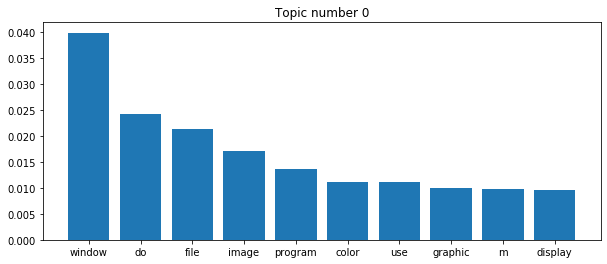

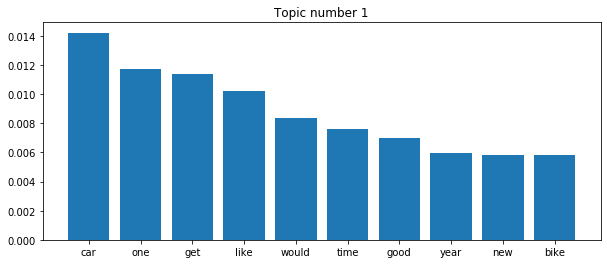

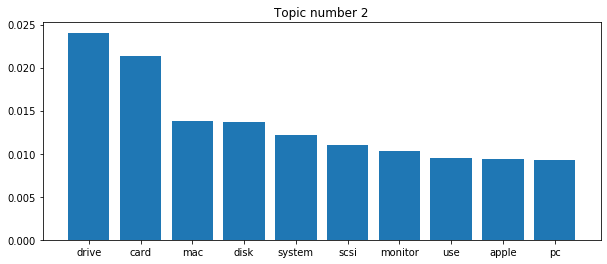

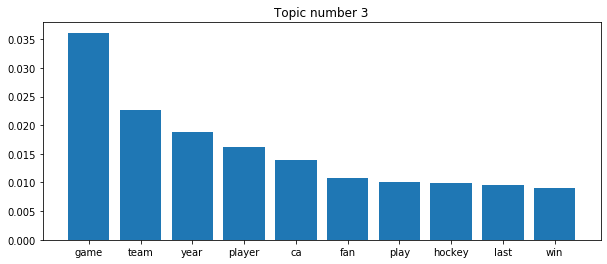

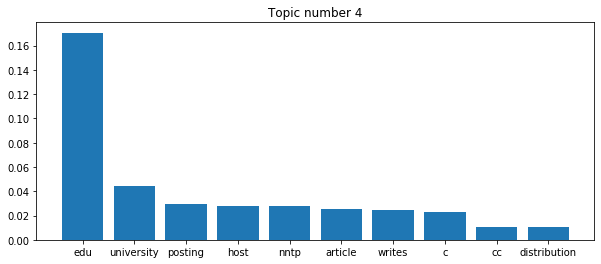

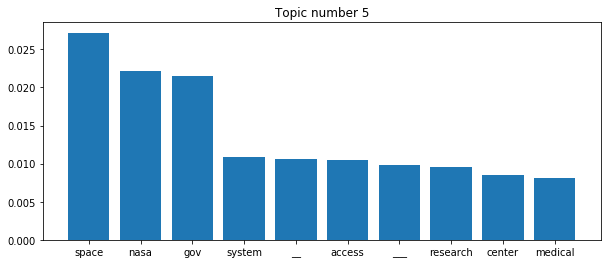

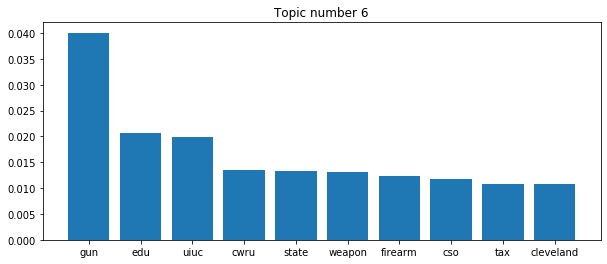

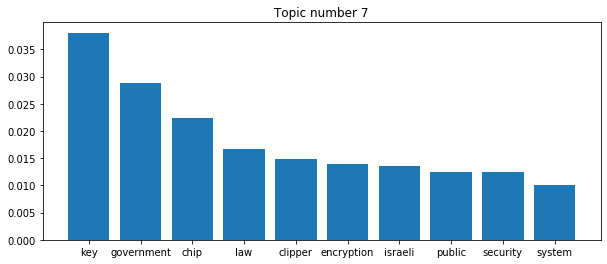

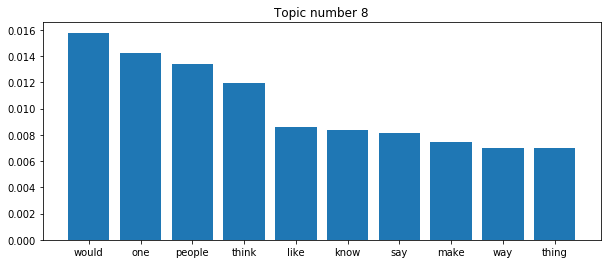

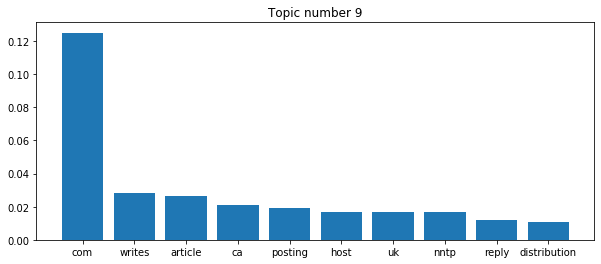

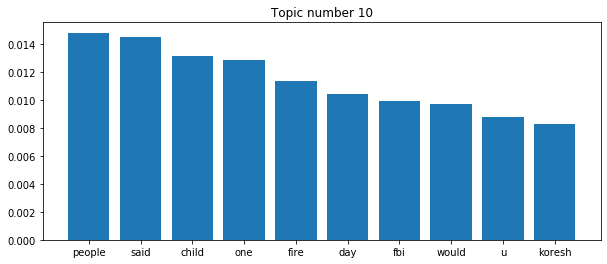

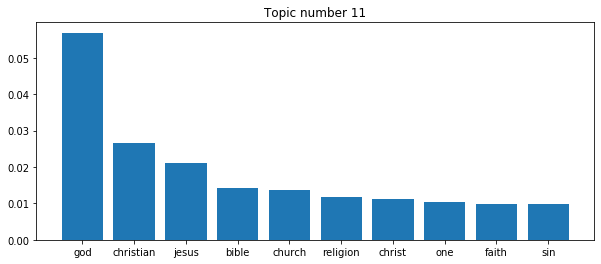

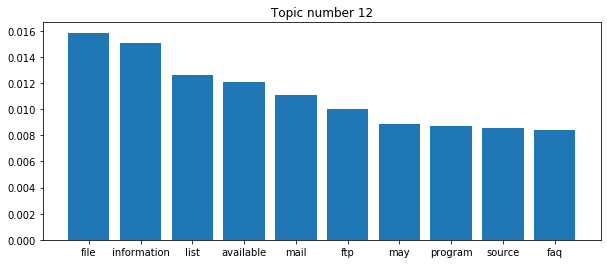

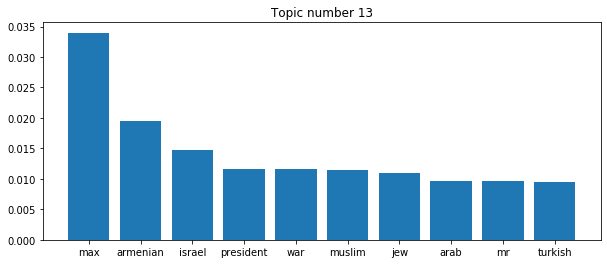

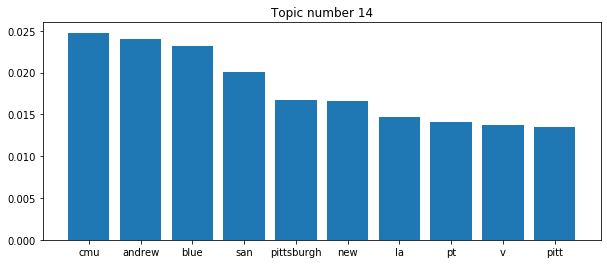

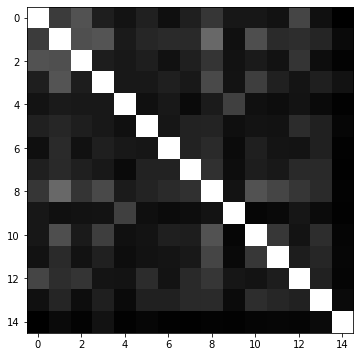

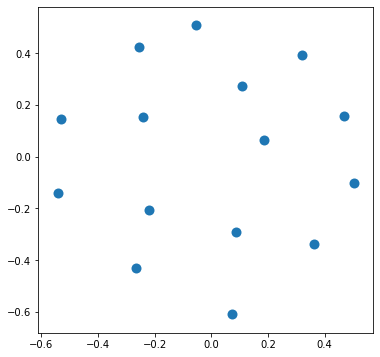

Topic number  0 ['medium mit edu david young shell mit medium laboratory us created us color available bit display move window get effect fine basically program work problem question user input want set result get window get default like window application get suggestion thanks david']
Topic number  1 ['com id hate picked today went visit friend minute ride work minor last minute ride rest ride got morning needed go home get disk stuff work computer hell cold time got home since another set said heck back funny blue sky thing seen quite showed minute trip oh right hand mirror finally showed dealer bike first got put replacement mirror entire time thing bike see thing plus flat instead like stock mirror get got replacement original front edge spent half hour thing thing still hate bike cell anyone seen good source passing light since system handle use thinking putting couple passing light would give night riding battery normal use day trip work back']
Topic number  2 ['net james trade m

Topic number  0 tc: 0.4720833065639729
Topic number  1 tc: 0.2855101879773418
Topic number  2 tc: 0.29751701608202785
Topic number  3 tc: 0.2745854732744148
Topic number  4 tc: 0.22658729364555136
Topic number  5 tc: 0.22349791378101655
Topic number  6 tc: 0.19939970429431045
Topic number  7 tc: 0.24280718444698637
Topic number  8 tc: 0.3352011557693057
Topic number  9 tc: 0.20973081533495164
Topic number  10 tc: 0.3029468782557149
Topic number  11 tc: 0.3188172528661001
Topic number  12 tc: 0.39653704631151654
Topic number  13 tc: 0.20182759281067747
Topic number  14 tc: 0.2389838132872636
Topic coherence: 0.2817355089800768
Topic diversity 0.7706666666666667


In [13]:
eval_model(beta, theta, dictionary, train_docs, num_topics, 
           top_n_show=10, m_most=1, top_n_coherence=10, top_n_diversity=25)